In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Excel File load
df = pd.read_excel(
    "Jumbo & Company_ Attach % .xls",
    engine="xlrd"
)

In [3]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [4]:
df.shape

(163, 7)

In [5]:
df.columns

Index(['Branch', 'Store_Name', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


In [7]:
# Summary statistics using .describe()
df.describe(include='all')

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
count,163,163,163.000000,163.000000,163.000000,163.000000,163.000000
unique,6,163,NaN,NaN,NaN,NaN,NaN
top,Delhi_Ncr,Delhi(Janakpuri) Br,NaN,NaN,NaN,NaN,NaN
freq,44,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.217239,0.217117,0.170920,0.167301,0.128589
std,NaN,NaN,0.173270,0.131246,0.116125,0.134518,0.116640
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.095000,0.130000,0.100000,0.080000,0.035000
50%,NaN,NaN,0.200000,0.200000,0.160000,0.150000,0.110000
75%,NaN,NaN,0.300000,0.295000,0.240000,0.245000,0.190000


In [8]:
# Checking if missing data or null values are present in the dataset
df.isnull().sum()

Branch        0
Store_Name    0
Dec           0
Nov           0
Oct           0
Sep           0
Aug           0
dtype: int64

In [10]:
df_long = pd.melt(df,
    id_vars=['Branch', 'Store_Name'],
    value_vars=['Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    var_name='Month',
    value_name='Attach%'
)

In [11]:
print("shape:",df_long.shape)
print(df_long.head())

shape: (815, 4)
      Branch               Store_Name Month  Attach%
0  Delhi_Ncr      Delhi(Janakpuri) Br   Aug     0.24
1  Delhi_Ncr      Haryana(Gurgaon) Br   Aug     0.04
2  Delhi_Ncr     Up(Greater Noida) Br   Aug     0.43
3       Pune         Pune(Bhosari) Br   Aug     0.32
4    Gujarat  Ahmedabad(Maninagar) Br   Aug     0.17


In [12]:
# Branch Wise Average Attach %
branch_avg = (
    df_long.groupby('Branch')['Attach%']
    .mean()
    .sort_values(ascending=False)
)

print("Branch Ranking:")
print(branch_avg)

Branch Ranking:
Branch
Pune         0.276500
Delhi_Ncr    0.243682
Mumbai       0.173474
Thane        0.148600
Gujarat      0.134583
Telangana    0.118350
Name: Attach%, dtype: float64


In [13]:
# Month-wise Average Attach %
month_trends = (
    df_long.groupby('Month')['Attach%']
    .mean()
)

print("Month Trends:")
print(month_trends)

Month Trends:
Month
Aug    0.128589
Dec    0.217239
Nov    0.217117
Oct    0.170920
Sep    0.167301
Name: Attach%, dtype: float64


In [14]:
# Categorize stores based on Attach %
df_long['Category'] = pd.qcut(
    df_long['Attach%'],
    3,
    labels=['Low', 'Medium', 'High']
)

In [15]:
# Count stores per Branch & Category
store_cat = (
    df_long.groupby(['Branch', 'Category'])['Store_Name']
    .nunique()
)
print("Store Categories:")
print(store_cat)

Store Categories:
Branch     Category
Delhi_Ncr  Low         21
           Medium      30
           High        37
Gujarat    Low         20
           Medium      21
           High        12
Mumbai     Low         14
           Medium      15
           High        13
Pune       Low          6
           Medium      11
           High        16
Telangana  Low         39
           Medium      34
           High        18
Thane      Low         17
           Medium      16
           High        13
Name: Store_Name, dtype: int64


C:\Users\ajitb\AppData\Local\Temp\ipykernel_17332\353778973.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_long.groupby(['Branch', 'Category'])['Store_Name']


In [16]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Pune'),
  Text(1, 0, 'Delhi_Ncr'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Thane'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Telangana')])

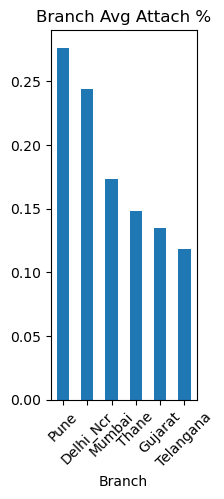

In [17]:
#  Branch-wise Avg Attach %
plt.subplot(1,3,1)
branch_avg.plot(kind='bar')
plt.title('Branch Avg Attach %')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aug'),
  Text(1, 0, 'Dec'),
  Text(2, 0, 'Nov'),
  Text(3, 0, 'Oct'),
  Text(4, 0, 'Sep')])

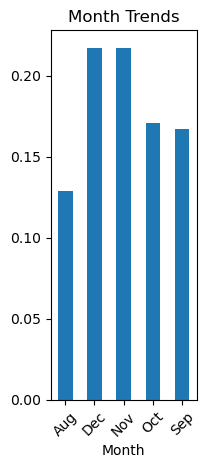

In [18]:
# Month-wise Trend
plt.subplot(1,3,2)
month_trends.plot(kind='bar')
plt.title('Month Trends')
plt.xticks(rotation=45)

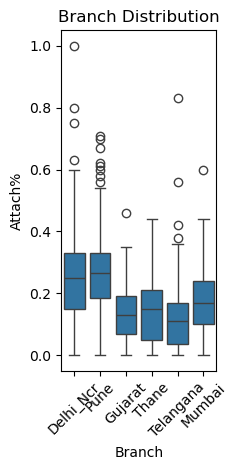

In [19]:
plt.subplot(1,3,3)
sns.boxplot(data=df_long, x='Branch', y='Attach%')
plt.title('Branch Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('analysis_charts.png')  # Save image
plt.show()

#### January Prediction (Store-Wise)

In [29]:
from sklearn.linear_model import LinearRegression

jan_predictions = {}

month_order = {'Aug':0, 'Sep':1, 'Oct':2, 'Nov':3, 'Dec':4}

for store in df_long['Store_Name'].unique():
    store_data = df_long[df_long['Store_Name'] == store].copy()
    store_data['Month_Num'] = store_data['Month'].map(month_order)

    X = store_data['Month_Num'].values.reshape(-1, 1)
    y = store_data['Attach%'].values

    model = LinearRegression().fit(X, y)
    jan_pred = model.predict([[5]])[0]

    jan_predictions[store] = round(max(jan_pred, 0), 2)

jan_df = pd.DataFrame(
    list(jan_predictions.items()),
    columns=['Store_Name', 'Jan_Predicted']
)

jan_df.head()

,Store_Name,Jan_Predicted
0,Delhi(Janakpuri) Br,0.18
1,Haryana(Gurgaon) Br,0.28
2,Up(Greater Noida) Br,0.23
3,Pune(Bhosari) Br,0.36
4,Ahmedabad(Maninagar) Br,0.15


In [30]:
summary = pd.DataFrame({
    'Metric': ['Best Branch', 'Worst Branch', 'Best Month', 'Avg Attach %', 'Jan Prediction Range'],
    'Value': [
        branch_avg.index[0],                       # Best Branch
        branch_avg.index[-1],                      # Worst Branch
        month_trends.idxmax(),                     # Best Month
        round(df_long['Attach%'].mean(), 2),      # Avg Attach %
        f"{round(min([v for v in jan_predictions.values() if v is not np.nan]),1)}%-"
        f"{round(max([v for v in jan_predictions.values() if v is not np.nan]),1)}%"  # Jan Prediction Range
    ]
})

print(summary)

                 Metric      Value
0           Best Branch       Pune
1          Worst Branch  Telangana
2            Best Month        Dec
3          Avg Attach %       0.18
4  Jan Prediction Range  0.0%-0.9%


In [31]:
final_output = jan_df.copy()
final_output.to_excel(
    "Zopper_Attach_Percentage_Analysis_Jan_Prediction.xlsx",
    index=False
)